In [5]:
import os
import sys
import pandas as pd
import numpy as np
import csv
import json
import urllib
import requests

import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
 
    
%matplotlib inline
print("Starting program")

Starting program


Test #1: Plotting weather data

         0         1         2         3         4         5         6     \
0   -0.117523 -0.117523 -0.117523 -0.117523 -0.117523 -0.117523 -0.117523   
1    0.123688  0.133453  0.142242  0.152008  0.161774  0.171539  0.181305   
2    0.146149  0.157867  0.174469  0.193024  0.212555  0.231110  0.250641   
3    0.453766  0.471344  0.488922  0.506500  0.524078  0.541656  0.559235   
4    0.430328  0.453766  0.477203  0.501617  0.525055  0.548492  0.572906   
5    0.245758  0.273102  0.301422  0.328766  0.357086  0.385406  0.412750   
6    0.176422  0.203766  0.232086  0.259430  0.286774  0.315094  0.342438   
7    0.132477  0.163727  0.195953  0.228180  0.259430  0.291656  0.323883   
8    0.014313  0.044586  0.075836  0.106110  0.137360  0.168610  0.198883   
9   -0.164398 -0.139008 -0.113617 -0.088226 -0.063812 -0.038422 -0.010101   
10  -0.410492 -0.382172 -0.354828 -0.326508 -0.299164 -0.270844 -0.242523   
11  -0.740570 -0.716156 -0.687836 -0.658539 -0.629242 -0.599945 -0.570648   

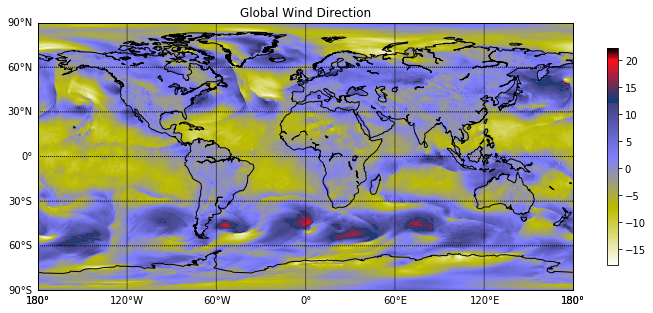

In [6]:
plt.figure(figsize=(12,8))
 
grib = '/Users/Xiao/Desktop/warp_gate/shipping/data/COPERNICUS/smolwind.grib' # Set the file name of your input GRIB file
grbs = pygrib.open(grib)
grb = grbs.select()[0]
data = grb.values
new_dataframe = pd.DataFrame(data)
print(new_dataframe)

# need to shift data grid longitudes from (0..360) to (-180..180)
lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data, lons = shiftgrid(180., data, lons, start=False)
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
 
m = Basemap(projection='cyl', llcrnrlon=-180, \
    urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')
 
x, y = m(grid_lon, grid_lat)
 
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.gist_stern_r)
 
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
 
plt.colorbar(cs,orientation='vertical', shrink=0.5)
plt.title('Global Wind Direction') # Set the name of the variable to plot
plt.show()
# plt.savefig(grib+'.png') # Set the output file name